# Plotting the hand
Here we open an example set of points generated by plot_hand and try to plot them. 

In [1]:
import numpy as np

In [2]:
points = np.loadtxt('example_points.csv', delimiter=',')

print(points)

[[-15.04150486 -41.86407471 -18.00700378  20.04547119  47.69254684
   68.75130463  16.09869003  33.45568466  43.2273407   50.09693527
   -3.15515447   7.39639759  13.8894186   18.31932068 -24.65928459
  -18.12480736 -13.70641804 -10.52262688 -44.49931717 -45.99407959
  -46.44226074 -46.54747009]
 [  9.32248592  53.71367264  67.2833786   39.17126465  22.74569321
   19.83664513  -3.22261262 -40.09827423 -60.86963272 -75.47877502
  -11.50528908 -55.85889816 -82.07369995 -99.3653183  -13.99247551
  -55.78463364 -81.72735596 -99.1815033  -14.05760098 -47.48445511
  -66.05242157 -82.4285202 ]
 [ 97.860672   101.32015991  91.50532532  94.87999725  98.80455017
  105.32975006 100.57141113 102.8857193  102.1696167  100.45584869
  102.25536346 106.61133575 107.4411087  106.98881531 101.82740021
  105.43689728 105.97948456 105.35443878  97.3216629  100.35638428
  100.99573517 100.76532745]]


In [3]:
len(points)

3

In [5]:
# Four bones for each of the 5 fingers = 20
# + Palm Position and Wrist
len(points[1])

22

Getting the points for one finger:

``
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger. This joint is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
``

In [6]:
i = 0
n = 4*i + 2

mcp_t = points[:,n+0]
pip_t = points[:,n+1]
dip_t = points[:,n+2]
tip_t = points[:,n+3]

mcp_t, pip_t, dip_t, tip_t

(array([-18.00700378,  67.2833786 ,  91.50532532]),
 array([20.04547119, 39.17126465, 94.87999725]),
 array([47.69254684, 22.74569321, 98.80455017]),
 array([ 68.75130463,  19.83664513, 105.32975006]))

In [7]:
for i in range(0,5):
    n = 4*i + 2

    mcp_t = points[:,n+0]
    pip_t = points[:,n+1]
    dip_t = points[:,n+2]
    tip_t = points[:,n+3]

    print(mcp_t, pip_t, dip_t, tip_t)

[-18.00700378  67.2833786   91.50532532] [20.04547119 39.17126465 94.87999725] [47.69254684 22.74569321 98.80455017] [ 68.75130463  19.83664513 105.32975006]
[ 16.09869003  -3.22261262 100.57141113] [ 33.45568466 -40.09827423 102.8857193 ] [ 43.2273407  -60.86963272 102.1696167 ] [ 50.09693527 -75.47877502 100.45584869]
[ -3.15515447 -11.50528908 102.25536346] [  7.39639759 -55.85889816 106.61133575] [ 13.8894186  -82.07369995 107.4411087 ] [ 18.31932068 -99.3653183  106.98881531]
[-24.65928459 -13.99247551 101.82740021] [-18.12480736 -55.78463364 105.43689728] [-13.70641804 -81.72735596 105.97948456] [-10.52262688 -99.1815033  105.35443878]
[-44.49931717 -14.05760098  97.3216629 ] [-45.99407959 -47.48445511 100.35638428] [-46.44226074 -66.05242157 100.99573517] [-46.54747009 -82.4285202  100.76532745]


# Plotting the hand as points

<IPython.core.display.Javascript object>


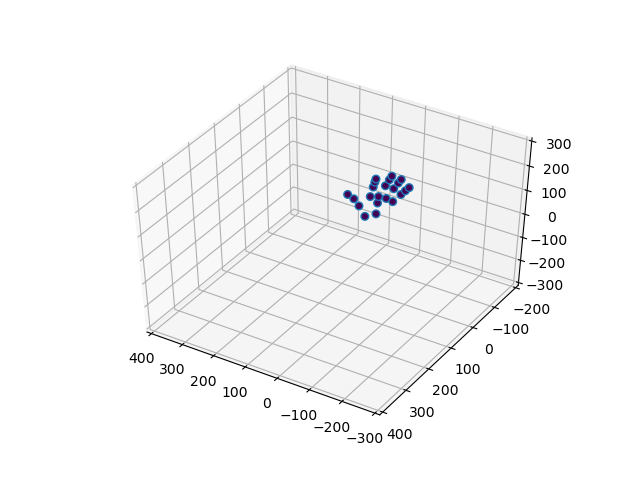

In [19]:
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-300, 400), ylim=(-200, 400), zlim=(-300, 300))
ax.view_init(elev=45., azim=122)
colors = np.array([100]*22)

patches = ax.scatter(points[0], points[1], points[2], s=[30]*22, alpha=1)
patches.set_array(colors)

def plot_points(points):
	patches.set_offsets(points[:2].T)
	patches.set_3d_properties(points[2], zdir='z')

def animate(i):
	plot_points(points)
	return patches,

def main():
	anim = animation.FuncAnimation(fig, animate, blit=False, interval=2)
	try:
		plt.show()
	except KeyboardInterrupt:
		sys.exit(0)
        
main()

# Adding lines for bones

``
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger. This joint is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
``

<IPython.core.display.Javascript object>


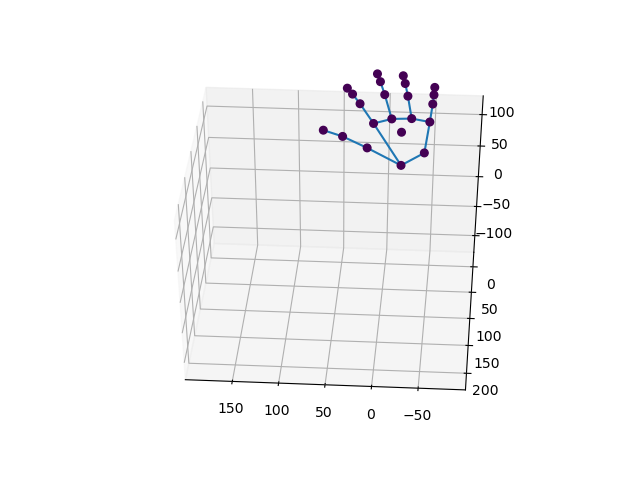

In [18]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-300, 300), ylim=(-200, 400), zlim=(-300, 300))
ax.view_init(elev=45., azim=122)

# Points setup
patches = ax.scatter(points[0], points[1], points[2], s=[30]*22, alpha=1)
patches.set_array(colors)

# Lines setup


def plot_lines(points):
    mcps = []
    
    # Wrist
    wrist = points[:,1]
    
    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = points[:,n+0]
        pip = points[:,n+1]
        dip = points[:,n+2]
        tip = points[:,n+3]
        
        # Connect the lowest joint to the middle joint    
        bot = plt3d.art3d.Line3D([mcp[0], pip[0]], [mcp[1], pip[1]], [mcp[2], pip[2]])
        ax.add_line(bot)
        
        # Connect the middle joint to the top joint
        mid = plt3d.art3d.Line3D([pip[0], dip[0]], [pip[1], dip[1]], [pip[2], dip[2]])
        ax.add_line(mid)       
        
        # Connect the top joint to the tip of the finger
        top = plt3d.art3d.Line3D([dip[0], tip[0]], [dip[1], tip[1]], [dip[2], tip[2]])
        ax.add_line(top)        

        # Connect each of the fingers together
        mcps.append(mcp)
    for mcp in range(0,4):
        line = plt3d.art3d.Line3D([mcps[mcp][0], mcps[mcp+1][0]],
                                  [mcps[mcp][1], mcps[mcp+1][1]],
                                  [mcps[mcp][2], mcps[mcp+1][2]])
        ax.add_line(line)
    # Create the right side of the hand joining the pinkie mcp to the "wrist"
    line = plt3d.art3d.Line3D([wrist[0], mcps[4][0]],
                                  [wrist[1], mcps[3+1][1]],
                                  [wrist[2], mcps[3+1][2]])
    ax.add_line(line)
    
    # Generate the "Wrist", note right side is not right.
    line = plt3d.art3d.Line3D([wrist[0], mcps[0][0]],
                                  [wrist[1], mcps[0][1]],
                                  [wrist[2], mcps[0][2]])
    ax.add_line(line)
    
        
        
def plot_points(points):
    patches.set_offsets(points[:2].T)
    patches.set_3d_properties(points[2], zdir='z')


plot_points(points)
plot_lines(points)

Note the use of "wrist" here. The `wrist` variable was made using hand.wrist_position. 
This is not actually the end position of the wrist. 
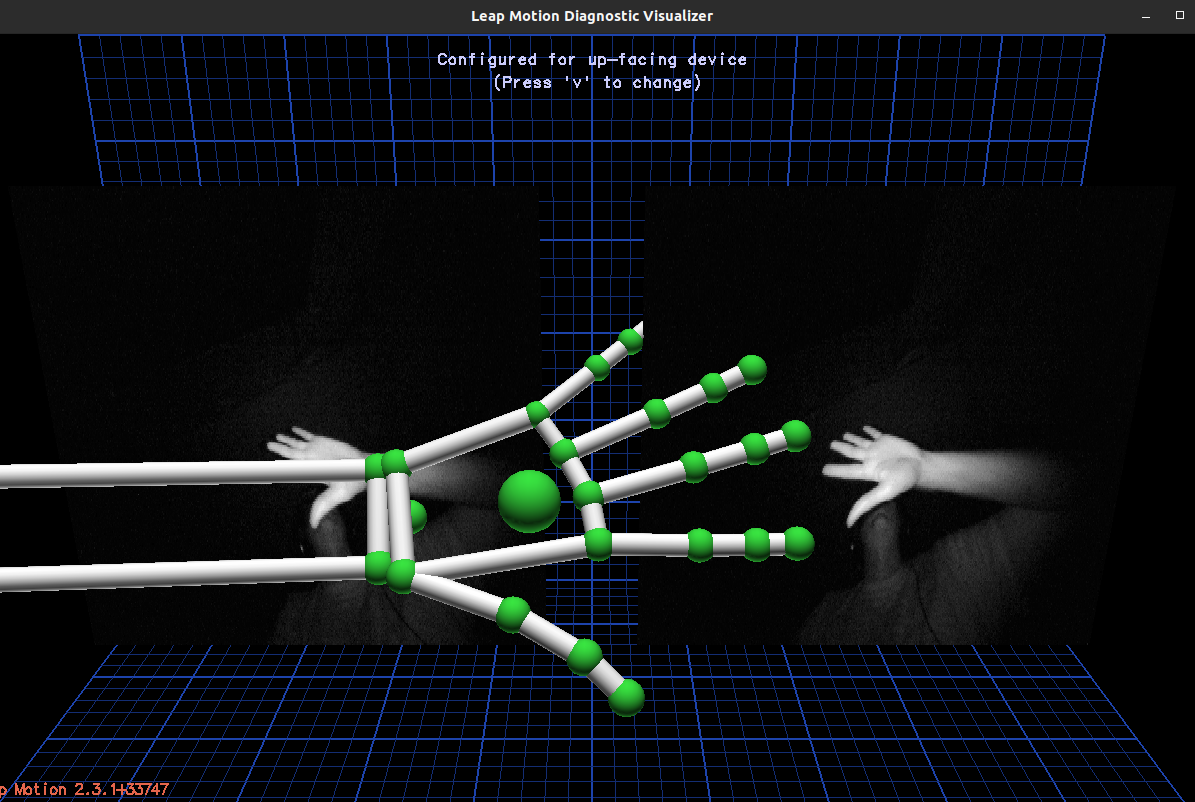

So we may think the wrist position would give us the otherside of the wrist, as shown in the Visualizer, but in fact I believe that it gives us that point close to the middle. Which we can see is offset vertically as in the above example. 

Each [bone](https://developer-archive.leapmotion.com/documentation/python/api/Leap.Bone.html), has a direction and length, and I believe you can use this to get the actual position. 


